import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Number of rows (daily data)
num_rows = 3000

# Generate random dates within the last 3 years
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)
date_range = pd.date_range(start=start_date, end=end_date, periods=num_rows)

# Function to generate realistic temperature based on month
def generate_temperature(date):
    month = date.month
    if month in [12, 1, 2]:  # Winter
        return np.random.randint(10, 26)
    elif month in [3, 4, 5, 6]:  # Summer
        return np.random.randint(25, 46)
    elif month in [7, 8, 9]:  # Monsoon
        return np.random.randint(20, 36)
    else:  # Post-Monsoon
        return np.random.randint(20, 31)

# Function to generate realistic humidity based on temperature
def generate_humidity(temp):
    if temp < 20:  # Cooler temperatures
        return np.random.randint(20, 61)
    elif temp < 30:  # Moderate temperatures
        return np.random.randint(40, 81)
    else:  # Higher temperatures
        return np.random.randint(60, 101)

# Function to generate random times mostly between 7 AM and 12 PM
def generate_time():
    if np.random.rand() < 0.8:  # 80% chance to be between 7 AM and 12 PM
        hour = np.random.randint(7, 13)
    else:  # 20% chance to be at other times
        hour = np.random.randint(0, 24)
    minute = np.random.randint(0, 60)
    return f"{hour:02}:{minute:02}"

# Corporate size
corporate_size = 5000

# List of corporate names
corporates = ['Corporate A', 'Corporate B', 'Corporate C', 'Corporate D']

# Function to generate thermostat settings based on outdoor temperature
def generate_thermostat_setting(temp):
    if temp >= 30:
        return np.random.randint(18, 21)  # Cooler settings for hot temperatures
    elif temp >= 20:
        return np.random.randint(21, 23)  # Moderate settings for moderate temperatures
    else:
        return np.random.randint(23, 25)  # Warmer settings for cooler temperatures

# Generate daily data
corporate_names = np.random.choice(corporates, num_rows)
data = {
    "Date (YYYY-MM-DD)": date_range.date,
    "Time (HH:MM)": [generate_time() for _ in range(num_rows)],
    "Outdoor Temperature (°C)": [generate_temperature(date) for date in date_range],
    "Corporate": corporate_names
}

# Generate realistic data considering parameter influences
data["Humidity (%)"] = [generate_humidity(temp) for temp in data["Outdoor Temperature (°C)"]]

# Adjust HVAC Energy Consumption based on temperature
def calculate_hvac_energy(temp, humidity, size):
    if temp < 18:  # Heating mode
        return int(np.random.randint(100, 601) + temp * 2 + humidity * 0.5 + size * 0.03)
    else:  # Cooling mode
        return int(np.random.randint(50, 501) + temp * 1.5 + humidity * 0.3 + size * 0.02)

data["HVAC Energy Consumption (kWh)"] = [
    calculate_hvac_energy(temp, humidity, corporate_size) for temp, humidity in zip(data["Outdoor Temperature (°C)"], data["Humidity (%)"])
]

data["Lighting Energy Consumption (kWh)"] = [
    int(np.random.randint(20, 201) + corporate_size * 0.01)
] * num_rows

data["Equipment Energy Consumption (kWh)"] = [
    int(np.random.randint(30, 301) + corporate_size * 0.015)
] * num_rows

data["Total Energy Consumption (kWh)"] = [
    int(hvac + lighting + equipment) for hvac, lighting, equipment in zip(data["HVAC Energy Consumption (kWh)"], data["Lighting Energy Consumption (kWh)"], data["Equipment Energy Consumption (kWh)"])
]

# Create DataFrame
df = pd.DataFrame(data)

# Calculate corporate total energy consumption
df["Corporate Total Energy Consumption (kWh)"] = df.groupby("Corporate")["Total Energy Consumption (kWh)"].transform("sum")

# Adjust HVAC Mode based on temperature
df["HVAC Mode"] = np.where(df["Outdoor Temperature (°C)"] < 18, 'heating', 'cooling')

# Add additional columns
df["Solar Radiation (W/m²)"] = [
    np.random.randint(500, 1001) if temp > 25 else np.random.randint(0, 501) for temp in df["Outdoor Temperature (°C)"]
]

df["Wind Speed (m/s)"] = [
    np.random.randint(5, 16) if humidity > 60 else np.random.randint(0, 11) for humidity in df["Humidity (%)"]
]

df["Precipitation (mm)"] = [
    np.random.randint(100, 301) if humidity > 70 else np.random.randint(0, 51) for humidity in df["Humidity (%)"]
]

df["Occupancy Level (%)"] = np.random.randint(0, 101, num_rows)

df["Thermostat Settings (°C)"] = [generate_thermostat_setting(temp) for temp in df["Outdoor Temperature (°C)"]]

df["Lighting Schedule"] = np.random.choice(['on', 'off'], num_rows)

df["Equipment Usage"] = np.random.choice(['high', 'medium', 'low'], num_rows)

df["Insulation Quality"] = np.random.choice(['poor', 'average', 'good'], num_rows)

df["Window Type"] = np.random.choice(['single-pane', 'double-pane', 'triple-pane'], num_rows)

df["Building Age (years)"] = np.random.randint(1, 101, num_rows)

df["Energy Tariffs (₹/kWh)"] = np.random.randint(3, 11, num_rows)

df["Public Holidays"] = np.random.choice(['yes', 'no'], num_rows)

df["Special Events"] = np.random.choice(['yes', 'no'], num_rows)

# Convert to DataFrame and aggregate to monthly data
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'])
df.set_index('Date (YYYY-MM-DD)', inplace=True)

# Resample to monthly data and aggregate
monthly_data = df.resample('M').agg({
    'Total Energy Consumption (kWh)': 'sum',
    'HVAC Energy Consumption (kWh)': 'sum',
    'Lighting Energy Consumption (kWh)': 'sum',
    'Equipment Energy Consumption (kWh)': 'sum',
    'Corporate Total Energy Consumption (kWh)': 'sum',
    'Solar Radiation (W/m²)': 'mean',
    'Wind Speed (m/s)': 'mean',
    'Precipitation (mm)': 'mean',
    'Occupancy Level (%)': 'mean',
    'Thermostat Settings (°C)': 'mean',
    'Energy Tariffs (₹/kWh)': 'mean'
})

# Extract year and month from the date index
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.month

# Reorder columns to place 'Month' and 'Year' at the beginning and convert all to int
monthly_data = monthly_data[['Month', 'Year'] + [col for col in monthly_data.columns if col not in ['Month', 'Year']]]
monthly_data = monthly_data.astype(int)

# Save to Excel
monthly_data.to_excel('monthly_building_data.xlsx', index=False)

print("Monthly Excel file created successfully!")


In [2]:
import pandas as pd

# Load the data
df = pd.read_excel('D:/Kongsburg/Data/monthly_building_data.xlsx')

# Display the first few rows
print(df.head())

# Display basic information about the DataFrame
print(df.info())

# Display basic statistics
print(df.describe())


   Month  Year  Total Energy Consumption (kWh)  HVAC Energy Consumption (kWh)  \
0      8  2021                           72373                          46118   
1      9  2021                           70952                          36758   
2     10  2021                           71817                          36372   
3     11  2021                           69696                          35502   
4     12  2021                           78832                          43387   

   Lighting Energy Consumption (kWh)  Equipment Energy Consumption (kWh)  \
0                              20645                               14610   
1                              19926                               14268   
2                              20655                               14790   
3                              19926                               14268   
4                              20655                               14790   

   Corporate Total Energy Consumption (kWh)  Solar Radia

In [3]:
df.head()

,Month,Year,Total Energy Consumption (kWh),HVAC Energy Consumption (kWh),Lighting Energy Consumption (kWh),Equipment Energy Consumption (kWh),Corporate Total Energy Consumption (kWh),Solar Radiation (W/m²),Wind Speed (m/s),Precipitation (mm),Occupancy Level (%),Thermostat Settings (°C),Energy Tariffs (₹/kWh)
0,8,2021,72373,46118,20645,14610,54822560,603,8,89,45,20,6
1,9,2021,70952,36758,19926,14268,53485297,573,8,93,58,20,6
2,10,2021,71817,36372,20655,14790,55264646,499,8,97,48,21,6
3,11,2021,69696,35502,19926,14268,53455755,500,7,60,52,21,6
4,12,2021,78832,43387,20655,14790,55292938,258,5,41,51,22,6


In [4]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Check data types
print(df.dtypes)


Month                                       0
Year                                        0
Total Energy Consumption (kWh)              0
HVAC Energy Consumption (kWh)               0
Lighting Energy Consumption (kWh)           0
Equipment Energy Consumption (kWh)          0
Corporate Total Energy Consumption (kWh)    0
Solar Radiation (W/m²)                      0
Wind Speed (m/s)                            0
Precipitation (mm)                          0
Occupancy Level (%)                         0
Thermostat Settings (°C)                    0
Energy Tariffs (₹/kWh)                      0
dtype: int64
0
Month                                       int64
Year                                        int64
Total Energy Consumption (kWh)              int64
HVAC Energy Consumption (kWh)               int64
Lighting Energy Consumption (kWh)           int64
Equipment Energy Consumption (kWh)          int64
Corporate Total Energy Consumption (kWh)    int64
Solar Radiation (W/m²)               

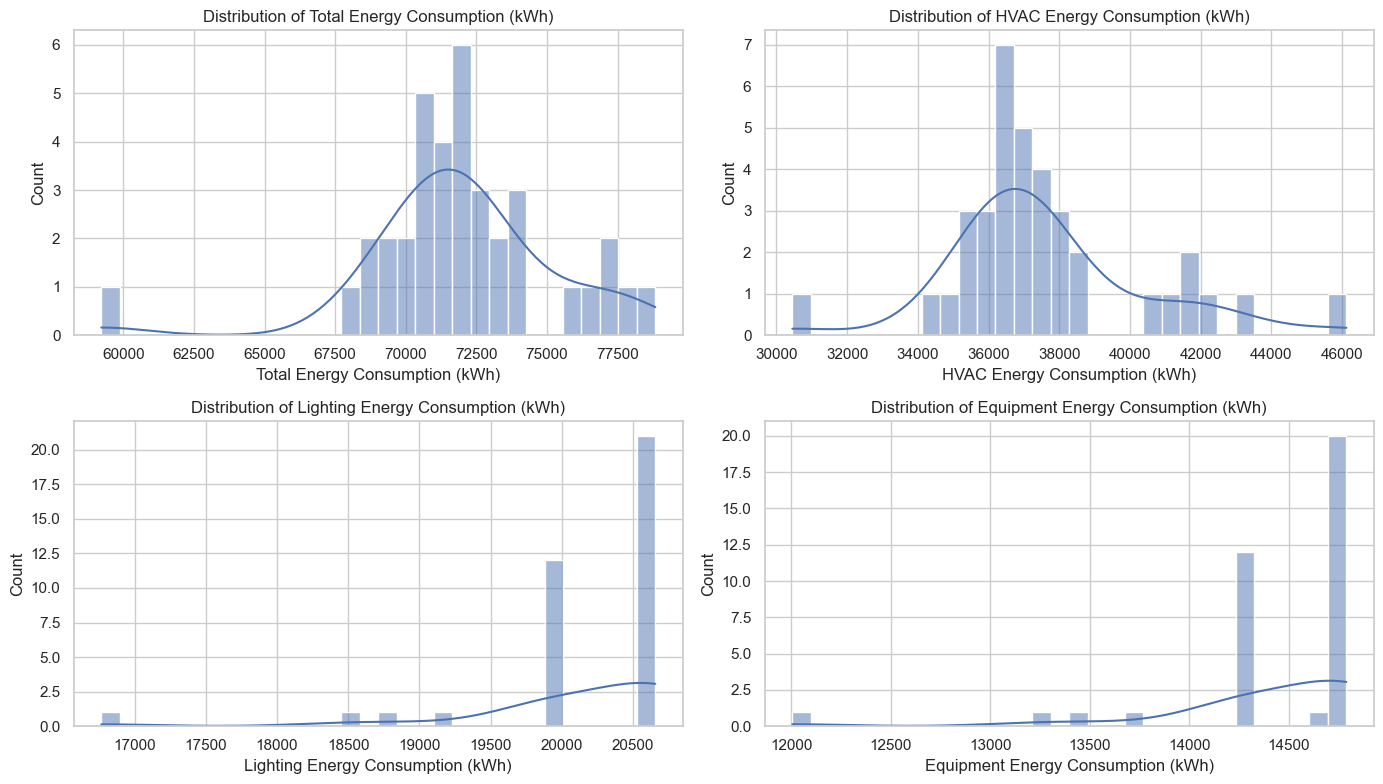

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for energy consumption columns
plt.figure(figsize=(14, 8))
for i, column in enumerate(['Total Energy Consumption (kWh)', 
                             'HVAC Energy Consumption (kWh)', 
                             'Lighting Energy Consumption (kWh)', 
                             'Equipment Energy Consumption (kWh)']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


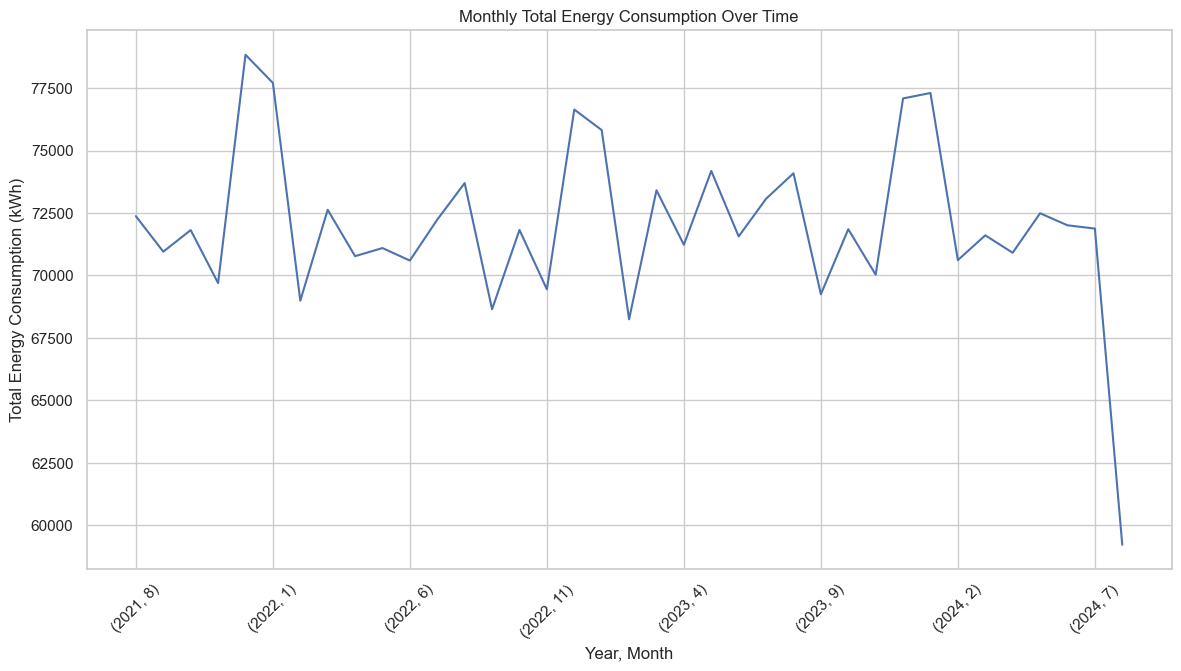

In [6]:
# Plot time series for total energy consumption
plt.figure(figsize=(14, 7))
df.set_index(['Year', 'Month'], inplace=True)
df.groupby(['Year', 'Month'])['Total Energy Consumption (kWh)'].sum().plot()
plt.title('Monthly Total Energy Consumption Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Total Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


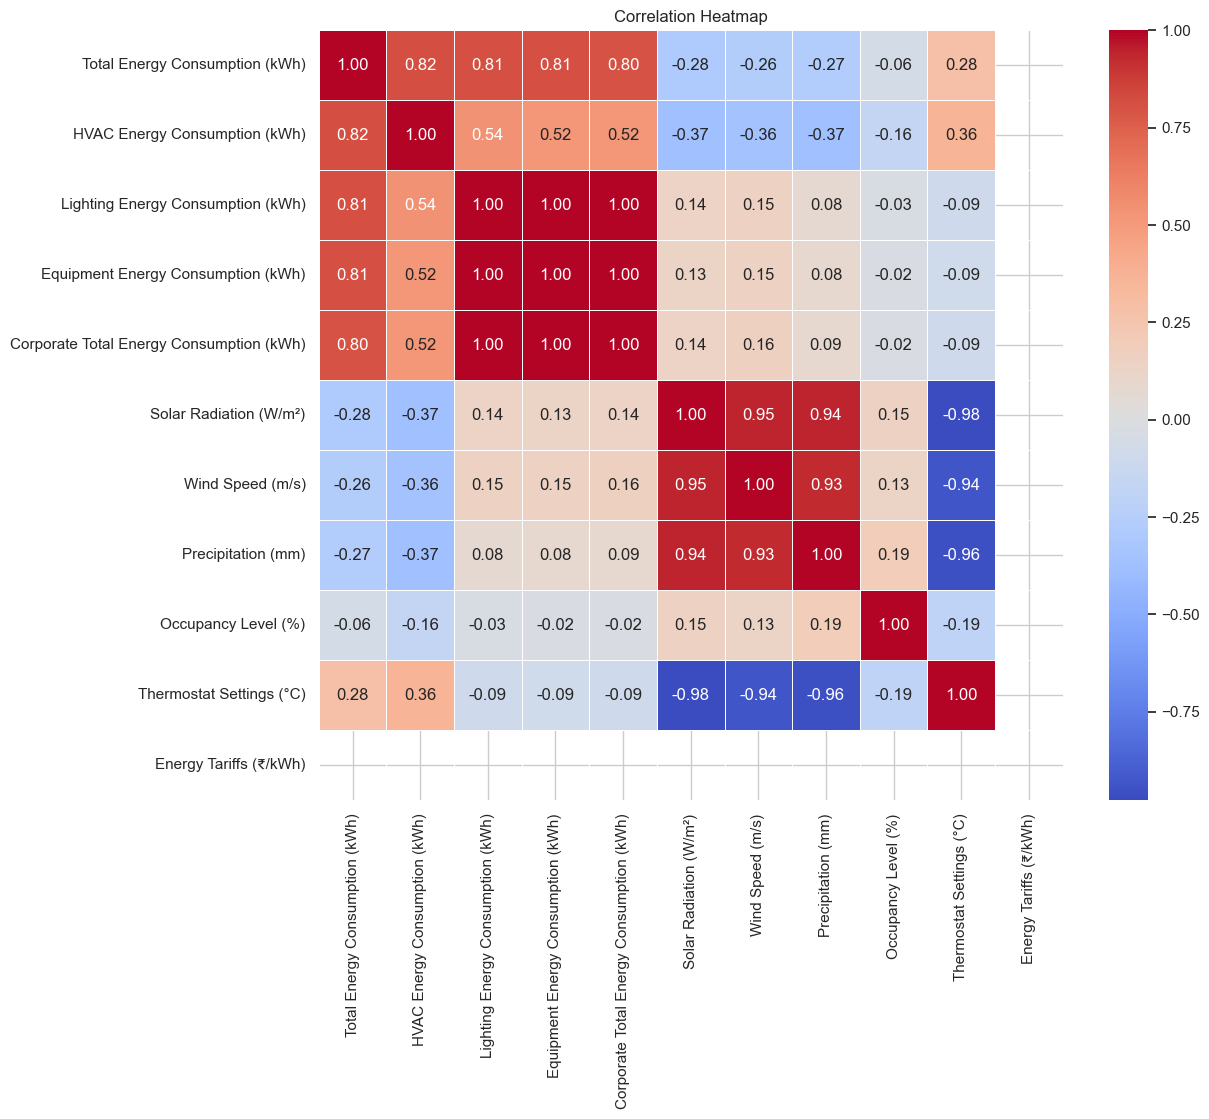

In [7]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


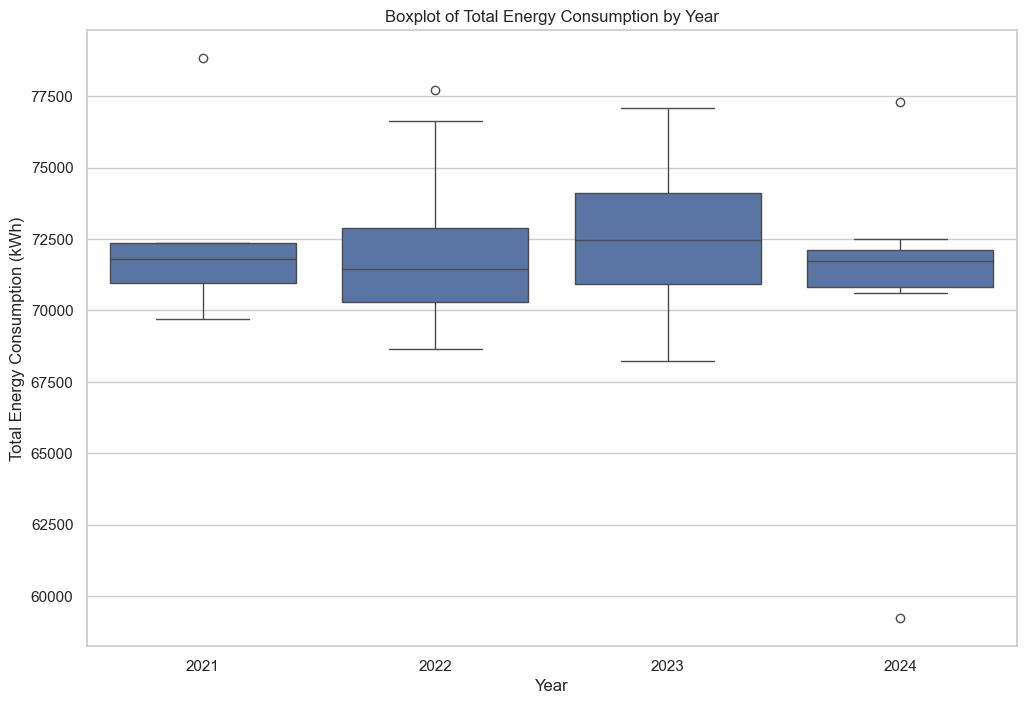

In [8]:
# Boxplot of total energy consumption by year
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Total Energy Consumption (kWh)', data=df.reset_index())
plt.title('Boxplot of Total Energy Consumption by Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (kWh)')
plt.show()


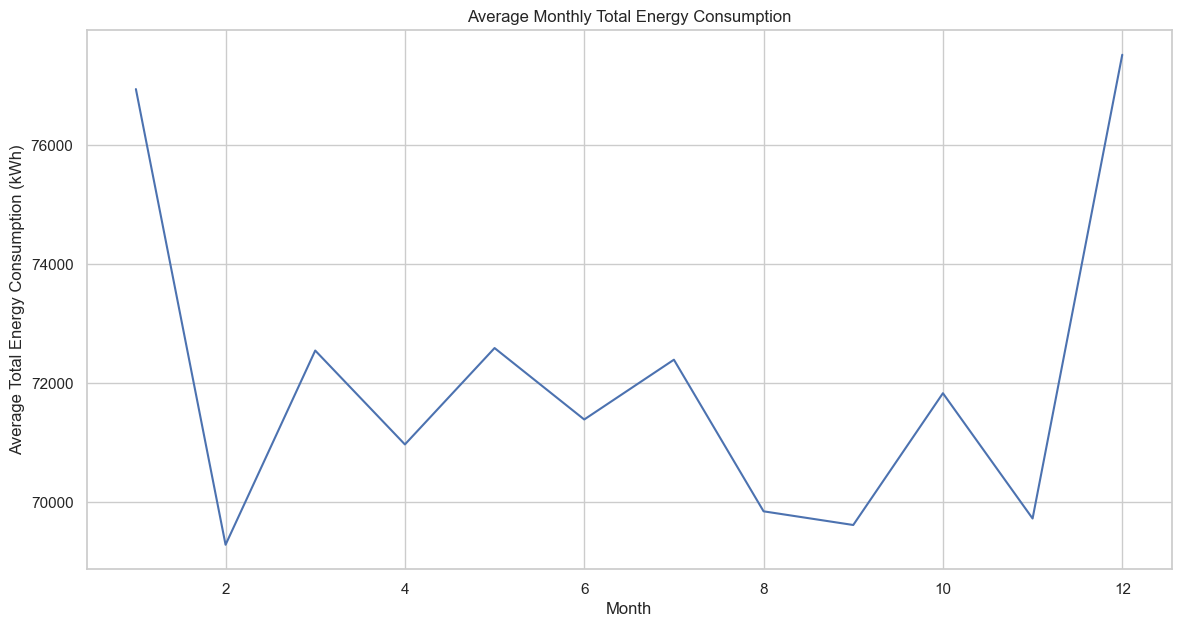

In [9]:
# Plot monthly total energy consumption across all years
plt.figure(figsize=(14, 7))
df.reset_index(inplace=True)
df.groupby('Month')['Total Energy Consumption (kWh)'].mean().plot()
plt.title('Average Monthly Total Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Total Energy Consumption (kWh)')
plt.grid(True)
plt.show()


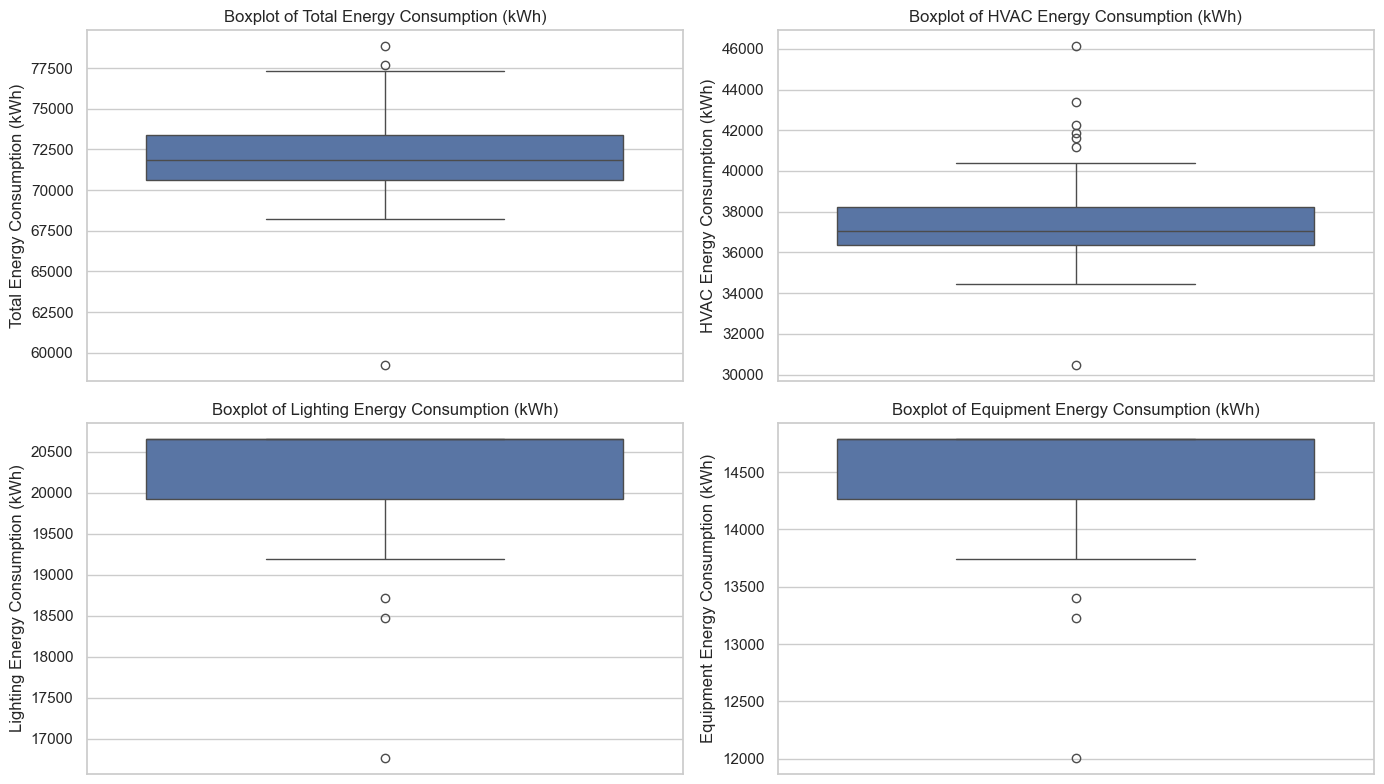

In [10]:
# Plot boxplots for key columns
plt.figure(figsize=(14, 8))
for i, column in enumerate(['Total Energy Consumption (kWh)', 
                             'HVAC Energy Consumption (kWh)', 
                             'Lighting Energy Consumption (kWh)', 
                             'Equipment Energy Consumption (kWh)']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [11]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load the data
df = pd.read_excel('D:/Kongsburg/Data/monthly_building_data.xlsx')

# Prepare features and target variable
df = df.reset_index()
df['Prev_Total_Energy_Consumption'] = df['Total Energy Consumption (kWh)'].shift(1)
df.dropna(inplace=True)  # Remove rows with NaN values resulting from shifting

X = df[['Year', 'Month', 'Prev_Total_Energy_Consumption']]
y = df['Total Energy Consumption (kWh)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model
joblib.dump(model, 'xgboost_model.pkl')


Mean Squared Error: 25757504.383850098


['xgboost_model.pkl']

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Best score found:  6581710.179930736


In [14]:
import pandas as pd
import joblib
from datetime import datetime

# Load the trained model
model = joblib.load('xgboost_model.pkl')

# Define the next month's year and month
next_month_year = 2024  # Change this to the desired year
next_month_number = 9   # Change this to the desired month

# Convert month number to month name
next_month_name = datetime(next_month_year, next_month_number, 1).strftime('%B')

# Create a DataFrame for next month's data
next_month = pd.DataFrame({
    'Year': [next_month_year],
    'Month': [next_month_number],
    'Prev_Total_Energy_Consumption': [y.iloc[-1]]  # Last known value
})

# Make prediction
next_month_prediction = model.predict(next_month)
print(f"Predicted Total Energy Consumption for {next_month_name} {next_month_year}: {next_month_prediction[0]} (kWh)")


Predicted Total Energy Consumption for September 2024: 71840.0546875 (kWh)
